<div style="text-align: center; background: linear-gradient(135deg, #1a2980, #26d0ce); 
            padding: 30px 25px; border-radius: 10px; color: white; 
            box-shadow: 0 4px 12px rgba(0,0,0,0.1); margin-bottom: 20px;">
    <div style="max-width: 600px; margin: 0 auto;">
        <div style="margin-bottom: 15px;">
            <h1 style="color: white; font-size: 2.5em; margin: 0; 
                       font-family: 'Segoe UI', Arial, sans-serif; 
                       text-shadow: 1px 1px 3px rgba(0,0,0,0.2);">
                Exploratory Data Analysis Report
            </h1>
        </div>
        <div style="margin-bottom: 20px; padding: 0 10px;">
            <p style="font-size: 1.2em; opacity: 0.95; margin: 0; 
                      line-height: 1.5; display: inline;">
                Comprehensive Financial Health & Market Risk Analysis
            </p>
        </div>
        <div>
            <div style="background-color: rgba(255,255,255,0.15); 
                        padding: 10px 25px; border-radius: 20px; 
                        display: inline-block;">
                <h3 style="color: white; margin: 0; font-weight: 400; 
                           font-size: 1.1em;">
                    <span style="font-weight: 600;">Author:</span> Hoang Son Lai | 
                    <span style="font-weight: 600;">Date:</span> 26/01/2026
                </h3>
            </div>
        </div>
    </div>
</div>

## Load datasets and process

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "notebook_connected"
pio.templates.default = "plotly_white"

# Load Data
fin_df = pd.read_csv('../../data/cleaned/financial_statements.csv')
stock_df = pd.read_csv('../../data/cleaned/stock_prices.csv')

  ticker report_date period       revenue          cogs  gross_profit  opex  \
0   AAPL  2025-09-30    12M  4.161610e+11  2.209600e+11  1.952010e+11     0   
1   AAPL  2024-09-30    12M  3.910350e+11  2.103520e+11  1.806830e+11     0   
2   AAPL  2023-09-30    12M  3.832850e+11  2.141370e+11  1.691480e+11     0   

   operating_income_ebit           ebt    net_income  ...  debt_to_equity  \
0           1.330500e+11  1.327290e+11  1.120100e+11  ...        3.872187   
1           1.232160e+11  1.234850e+11  9.373600e+10  ...        5.408780   
2           1.143010e+11  1.137360e+11  9.699500e+10  ...        4.673462   

   debt_ratio  interest_coverage_ratio       roa       roe  gross_margin  \
0    0.794753                      NaN  0.311796  1.519130      0.469052   
1    0.843964                      NaN  0.256825  1.645935      0.462063   
2    0.823741                29.062039  0.275098  1.560760      0.441311   

   net_margin  asset_turnover  inventory_turnover  receivables_turnov

In [10]:
# Basic information
print("Financial Statements Data:")
print(f"Shape: {fin_df.shape}")
print(f"Companies: {fin_df['ticker'].nunique()}")
print(f"Years covered: {fin_df['report_date'].str[:4].nunique()}")
print(f"Date range: {fin_df['report_date'].min()} to {fin_df['report_date'].max()}")
print("\n" + "="*80 + "\n")

print("Stock Prices Data:")
print(f"Shape: {stock_df.shape}")
print(f"Companies: {stock_df['ticker'].nunique()}")
print(f"Date Range: {stock_df['date'].min()} to {stock_df['date'].max()}")
print("\n" + "="*80 + "\n")

Financial Statements Data:
Shape: (96, 40)
Companies: 21
Years covered: 6
Date range: 2020-12-31 to 2025-09-30


Stock Prices Data:
Shape: (26376, 8)
Companies: 21
Date Range: 2020-12-07 to 2025-12-05




In [16]:
# Calculate revenue for all companies
revenue_summary = fin_df.groupby('ticker')['revenue'].agg(['mean', 'std', 'count']).sort_values('mean', ascending=False)

# Plotly chart
fig = go.Figure()

# Bar chart for average revenue
fig.add_trace(go.Bar(
    x=revenue_summary.index,
    y=revenue_summary['mean'],
    name='Average Revenue',
    error_y=dict(
        type='data',
        array=revenue_summary['std'],
        visible=True
    ),
    marker_color='royalblue',
    hovertemplate=
    '<b>%{x}</b><br>' +
    'Avg Revenue: $%{y:,.0f}<br>' +
    'Std Dev: $%{customdata[0]:,.0f}<br>' +
    '<extra></extra>',
    customdata=list(zip(revenue_summary['std'], revenue_summary['count']))
))

# Layout
fig.update_layout(
    title={
        'text': '<b>All Companies by Average Revenue (2021-2025)</b>',
        'font': {'size': 24}
    },
    xaxis_title="Company Ticker",
    yaxis_title="Average Revenue ($)",
    xaxis_tickangle=-45,
    hovermode="x unified",
    showlegend=False,
    template="plotly_white",
    height=600,
    margin=dict(l=50, r=50, t=80, b=150),
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='LightGray',
        tickmode='linear',
        dtick=1  
    ),
    yaxis=dict(
        tickformat="$,.0f",
        gridcolor='LightGray',
        gridwidth=1
    )
)

# Add annotation 
fig.add_annotation(
    x=0.5,
    y=1.05,
    xref="paper",
    yref="paper",
    text=f"Total Companies: {len(revenue_summary)}",
    showarrow=False,
    font=dict(size=12, color="gray")
)

fig.show()

In [25]:
# Calculate net margin
net_margin_summary = fin_df.groupby('ticker')['net_margin'].agg(['mean', 'std', 'count']).sort_values('mean', ascending=False)

# Plotly chart
fig = go.Figure()

# Bar chart for net margin
fig.add_trace(go.Bar(
    x=net_margin_summary.index,
    y=net_margin_summary['mean'] * 100,  # convert to percent
    name='Net Margin (%)',
    error_y=dict(
        type='data',
        array=net_margin_summary['std'].fillna(0) * 100,
        visible=True,
        thickness=1.5,
        width=2
    ),
    marker=dict(
        color=net_margin_summary['mean'] * 100,
        colorscale='RdYlGn',
        showscale=True,
        colorbar=dict(
            title=dict(text="Net Margin (%)", side="right"),
            ticksuffix="%"
        ),
        line=dict(
            color='rgba(0,0,0,0.3)',
            width=0.5
        )
    ),
    hovertemplate=
    '<b>%{x}</b><br>' +
    'Avg Net Margin: %{y:.2f}%<br>' +
    'Std Dev: %{customdata[0]:.2f}%<br>' +
    '<extra></extra>',
    customdata=list(zip(
        net_margin_summary['std'].fillna(0) * 100,
        net_margin_summary['count']
    ))
))

# Layout
fig.update_layout(
    title={
        'text': '<b>All Companies by Average Net Margin (2021-2025)</b><br><span style="font-size:14px;color:gray"></span>',
        'font': {'size': 24}
    },
    xaxis_title="Company Ticker",
    yaxis_title="Average Net Margin (%)",
    xaxis_tickangle=-45,
    hovermode="x unified",
    showlegend=False,
    template="plotly_white",
    height=600,
    margin=dict(l=50, r=50, t=100, b=150),
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='LightGray',
        tickmode='linear'
    ),
    yaxis=dict(
        ticksuffix="%",
        gridcolor='LightGray',
        gridwidth=1
    )
)

# Annotation 
fig.add_annotation(
    x=0.5,
    y=1.08,
    xref="paper",
    yref="paper",
    text=f"Total Companies: {len(net_margin_summary)}",
    showarrow=False,
    font=dict(size=12, color="gray"),
    align="center"
)

fig.show()

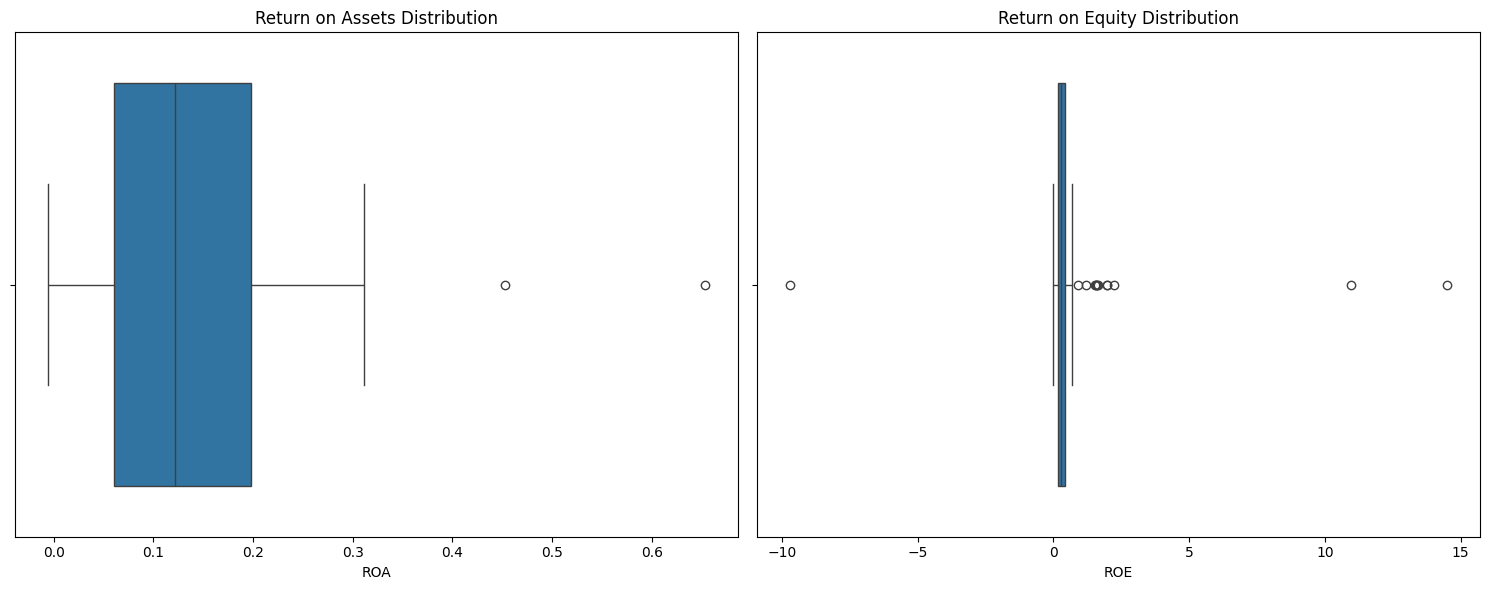

Top 5 by ROA: ['NVDA', 'AAPL', 'MA', 'HD', 'GOOGL']
Top 5 by ROE: ['HD', 'AAPL', 'MA', 'NVDA', 'V']


In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# ROA Distribution
sns.boxplot(data=fin_df, x='roa', ax=axes[0])
axes[0].set_title('Return on Assets Distribution')
axes[0].set_xlabel('ROA')

# ROE Distribution
sns.boxplot(data=fin_df, x='roe', ax=axes[1])
axes[1].set_title('Return on Equity Distribution')
axes[1].set_xlabel('ROE')

plt.tight_layout()
plt.show()

# Top performers
roa_top = fin_df.groupby('ticker')['roa'].mean().sort_values(ascending=False).head(5)
roe_top = fin_df.groupby('ticker')['roe'].mean().sort_values(ascending=False).head(5)

print("Top 5 by ROA:", roa_top.index.tolist())
print("Top 5 by ROE:", roe_top.index.tolist())

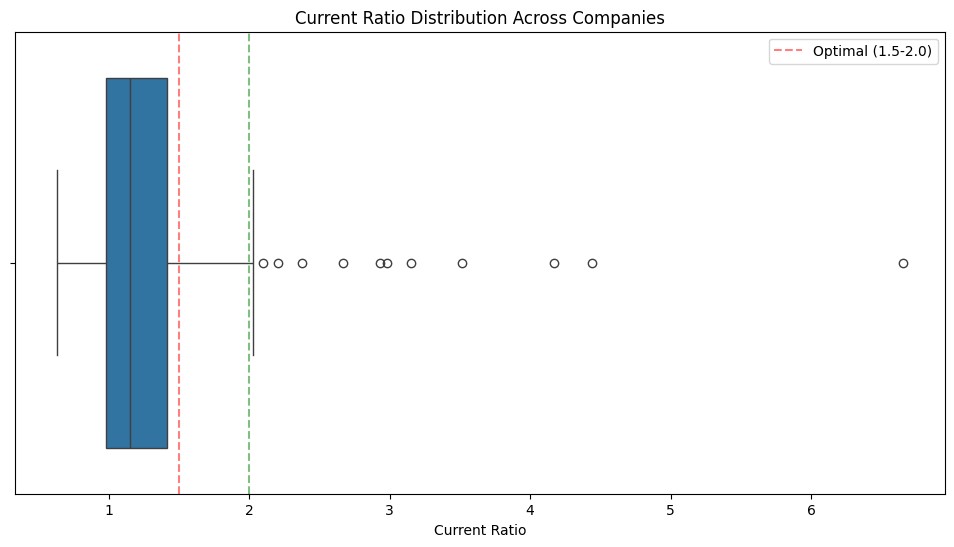


Companies with Average Current Ratio < 1:
ticker
PG      0.681736
DIS     0.719940
UNH     0.795327
WMT     0.850730
AAPL    0.906993
Name: current_ratio, dtype: float64


In [6]:
# Current ratio distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=fin_df, x='current_ratio')
plt.title('Current Ratio Distribution Across Companies')
plt.xlabel('Current Ratio')
plt.axvline(x=1.5, color='r', linestyle='--', alpha=0.5, label='Optimal (1.5-2.0)')
plt.axvline(x=2.0, color='g', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

# Companies with liquidity concerns
low_liquidity = fin_df[fin_df['current_ratio'] < 1].groupby('ticker')['current_ratio'].mean().sort_values()
print("\nCompanies with Average Current Ratio < 1:")
print(low_liquidity.head())

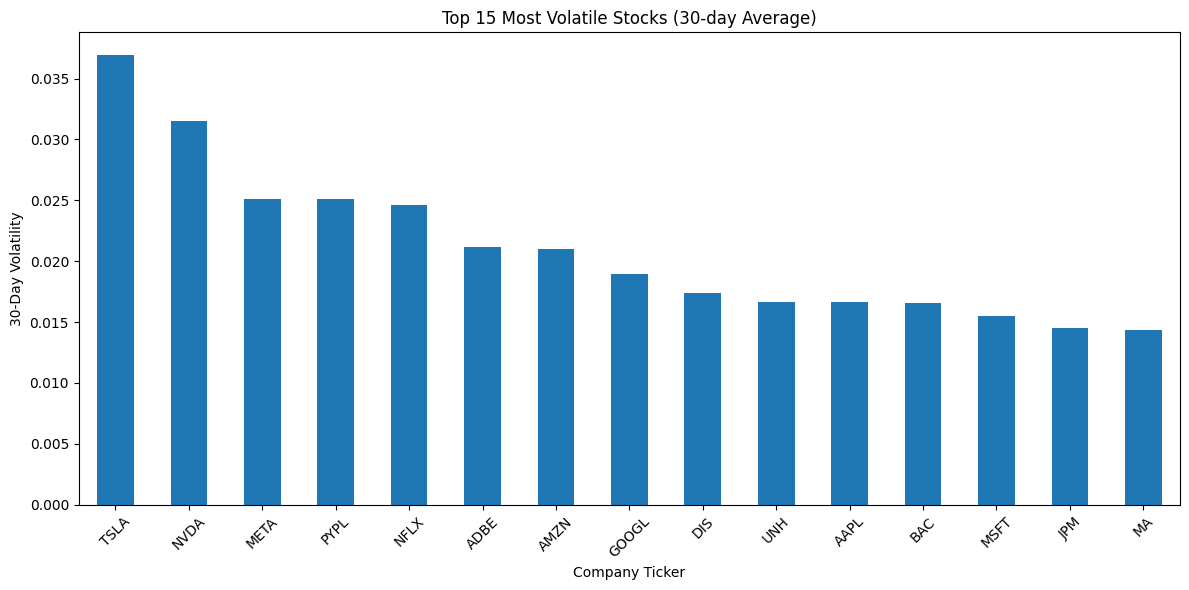

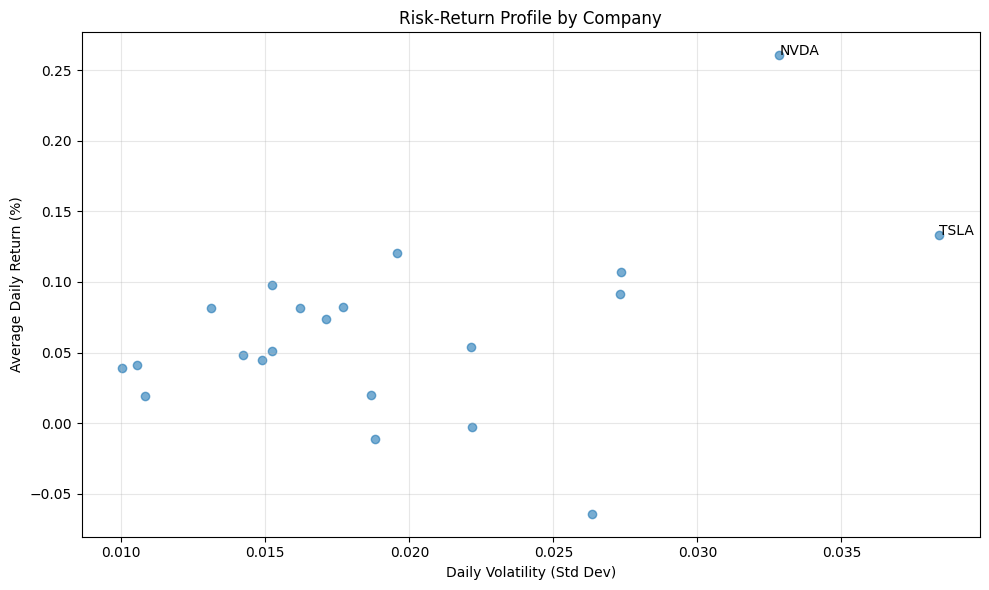

In [7]:
# Calculate daily returns and volatility
stock_df['date'] = pd.to_datetime(stock_df['date'])
stock_df['daily_return'] = stock_df.groupby('ticker')['close'].pct_change()

# Calculate rolling volatility (30-day)
stock_df['volatility_30d'] = stock_df.groupby('ticker')['daily_return'].transform(lambda x: x.rolling(30).std())

# Average volatility by company
avg_volatility = stock_df.groupby('ticker')['volatility_30d'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_volatility.head(15).plot(kind='bar')
plt.title('Top 15 Most Volatile Stocks (30-day Average)')
plt.xlabel('Company Ticker')
plt.ylabel('30-Day Volatility')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Risk-Return profile
risk_return = stock_df.groupby('ticker').agg(
    avg_return=('daily_return', 'mean'),
    volatility=('daily_return', 'std'),
    total_return=('daily_return', lambda x: (1 + x).prod() - 1)
).dropna()

plt.figure(figsize=(10, 6))
plt.scatter(risk_return['volatility'], risk_return['avg_return'] * 100, alpha=0.6)
plt.title('Risk-Return Profile by Company')
plt.xlabel('Daily Volatility (Std Dev)')
plt.ylabel('Average Daily Return (%)')

# Annotate outliers
for ticker in risk_return.index:
    if risk_return.loc[ticker, 'volatility'] > 0.035 or abs(risk_return.loc[ticker, 'avg_return']) > 0.0015:
        plt.annotate(ticker, (risk_return.loc[ticker, 'volatility'], risk_return.loc[ticker, 'avg_return'] * 100))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

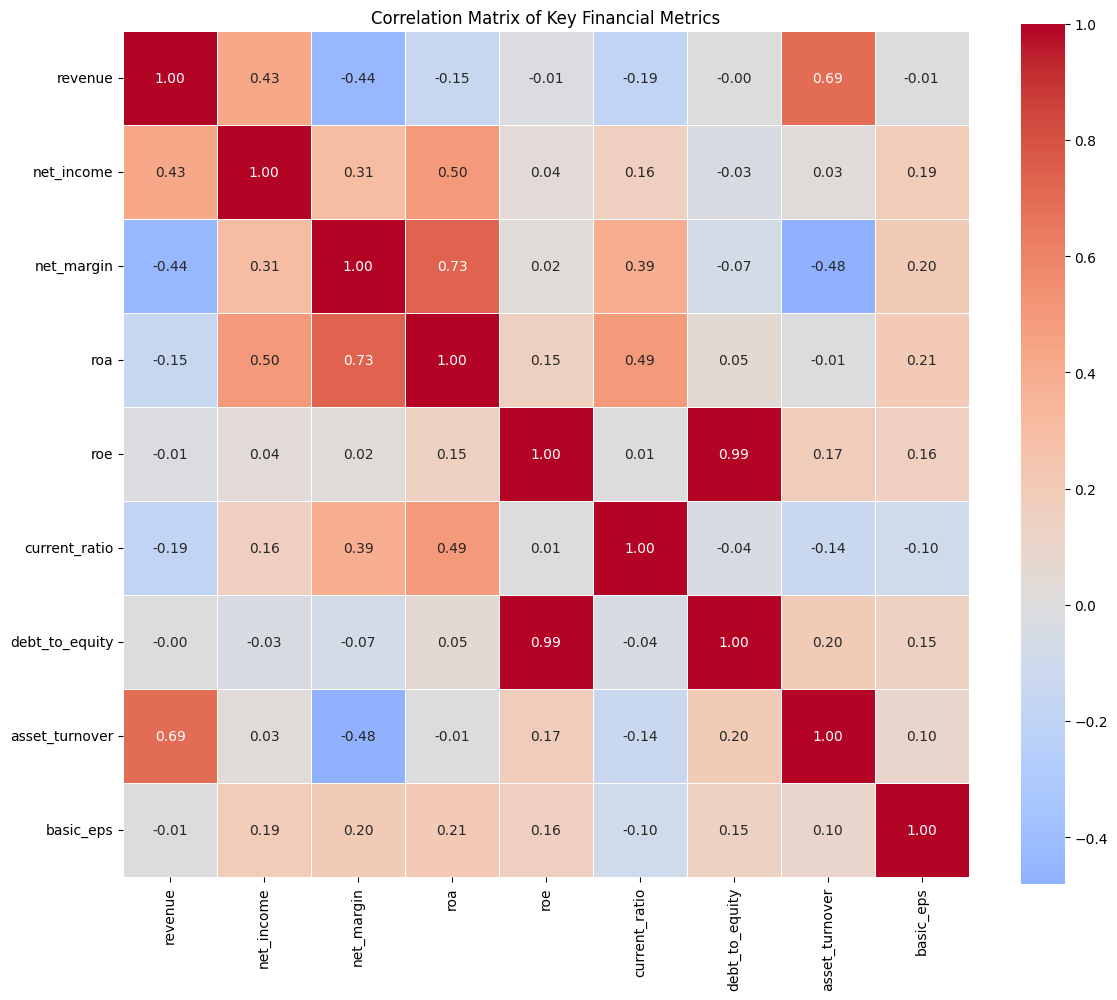

In [8]:
# Select key financial metrics for correlation
metrics = ['revenue', 'net_income', 'net_margin', 'roa', 'roe', 
           'current_ratio', 'debt_to_equity', 'asset_turnover', 'basic_eps']

corr_data = fin_df[metrics].dropna()
correlation_matrix = corr_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5)
plt.title('Correlation Matrix of Key Financial Metrics')
plt.tight_layout()
plt.show()